In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from data import data_dirs as data_env, get_label_with_context
from data_utils import SeveralSourceDataset, SegItemListCustom

from torch.utils.data import DataLoader as t_Dataloader
import torch
from fastai.vision import (
    Learner,
    open_image, open_mask,
    ImageList,
    get_transforms, imagenet_stats,
    ResizeMethod, DatasetType,
    DataBunch,
    plt,    # matplotlib.pyplot
    nn,     # torch.nn
    optim,  # torch.optim
    Tensor, # torch.Tensor
)

import warnings
warnings.filterwarnings("ignore")

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
for image in data_env.get_subdir("train images labeled").iterdir():
    print(get_label_with_context(image))

/home/dmitri/Documents/Datasets/skyFinderMod/train_labeled_labels/labeled_02 - February 2019 (myphotopack.com)_L.png
/home/dmitri/Documents/Datasets/skyFinderMod/train_labeled_labels/labeled_02 - March 2018 (myphotopack.com)_L.png
/home/dmitri/Documents/Datasets/skyFinderMod/train_labeled_labels/labeled_01 - October 2018 (myphotopack.com)_L.png
/home/dmitri/Documents/Datasets/skyFinderMod/train_labeled_labels/labeled_02 - July 2019 (myphotopack.com)_L.png
/home/dmitri/Documents/Datasets/skyFinderMod/train_labeled_labels/labeled_03 - February 2019 (myphotopack.com)_L.png
/home/dmitri/Documents/Datasets/skyFinderMod/train_labeled_labels/labeled_01 - May 2019 (myphotopack.com)_L.png


In [6]:
sizes=256

train_data = SeveralSourceDataset([data_env.get_subdir("train images skyFinder"), 
                                   data_env.get_subdir("train images raw"),
                                   data_env.get_subdir("train images sky"),
                                   data_env.get_subdir("train images labeled")
                                  ], 
                                  label_from_func=get_label_with_context, 
                                  transforms=[],
                                  batch_consistency=[15, 3, 1, 1], size=256)

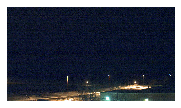

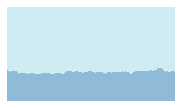

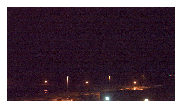

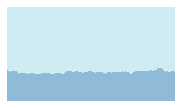

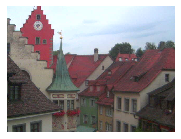

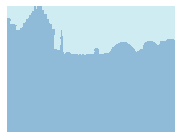

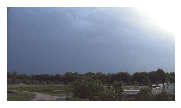

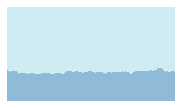

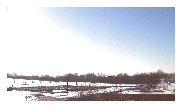

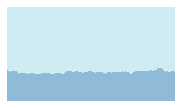

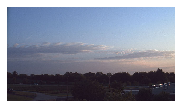

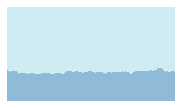

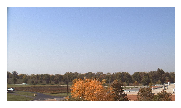

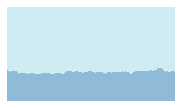

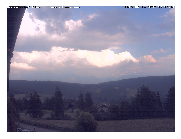

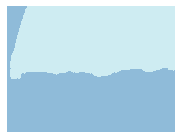

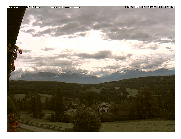

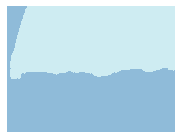

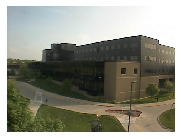

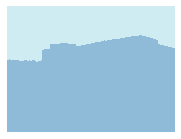

In [7]:
for img, lbl in [train_data.get(i) for i in range(10)]:
    img.show()
    lbl.show()